In [1]:
!pip install seaborn
!pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 9.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, date, datetime
import random
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib
import plotly.express as px


In [39]:
df = pd.read_csv('moonall.csv',encoding='cp1252')

In [40]:
col = "Launch Date"
df[col] = pd.to_datetime(df[col])
future = df[col] > datetime(year=2050, month=1, day=1)
df.loc[future, col] -= timedelta(days=365.25 * 100)
df.head()

# df = df.loc[
#     (df[col] >= "1940-01-01") & (df[col] < "2023-12-30")
# ]
df

/var/folders/8s/_5czndkj0bs5fy0_8y2bhytm0000gn/T/ipykernel_69688/4083164230.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,1958-08-17,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,1958-09-23,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,1958-10-11,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,1958-10-11,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,1958-11-08,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
...,...,...,...,...,...,...,...,...
153,Emirates Lunar Mission,Rashid,2022-12-11,Falcon 9 Block 5,UAE UAESA/MBRSC,Rover,Spacecraft failure,Lunar rover demonstration launched with Hakuto...
154,Lunar Flashlight,Lunar Flashlight,2022-12-11,Falcon 9 Block 5,United States NASA,Flyby,Spacecraft failure,Moved from Artemis 1 to Falcon 9. Thruster iss...
155,Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,2023-04-14,Ariane 5 ECA,European Union ESA,Flyby,En route,Will fly by the Moon in August 2024 en route t...
156,Chandrayaan-3,Chandrayaan-3,2023-07-14,LVM3 M4,India ISRO,Orbiter,Operational,Lander and rover operational. Soft-landed near...


In [41]:
df['Frequency'] = df.groupby('Outcome')['Outcome'].transform('count')
df.sort_values(['Frequency', 'Outcome'], inplace=True, ascending=[False, True])


In [42]:
sns.set(
    style="darkgrid",
    palette="pastel",
    color_codes=True,
    rc={"figure.figsize": (11.7, 8.27), "figure.dpi": 150},
    font_scale=0.65,
)
rank = df['Frequency'].argsort().argsort()
pal = sns.color_palette("Greens_d", len(df['Frequency']))

/var/folders/8s/_5czndkj0bs5fy0_8y2bhytm0000gn/T/ipykernel_69688/1618806930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df, palette=np.array(pal[::-1])[rank])
/var/folders/8s/_5czndkj0bs5fy0_8y2bhytm0000gn/T/ipykernel_69688/1618806930.py:1: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.countplot(x='Outcome', data=df, palette=np.array(pal[::-1])[rank])
/var/folders/8s/_5czndkj0bs5fy0_8y2bhytm0000gn/T/ipykernel_69688/1618806930.py:1: UserWarning: The palette list has more values (158) than needed (6), which may not be intended.
  ax = sns.countplot(x='Outcome', data=df, palette=np.array(pal[::-1])[rank])


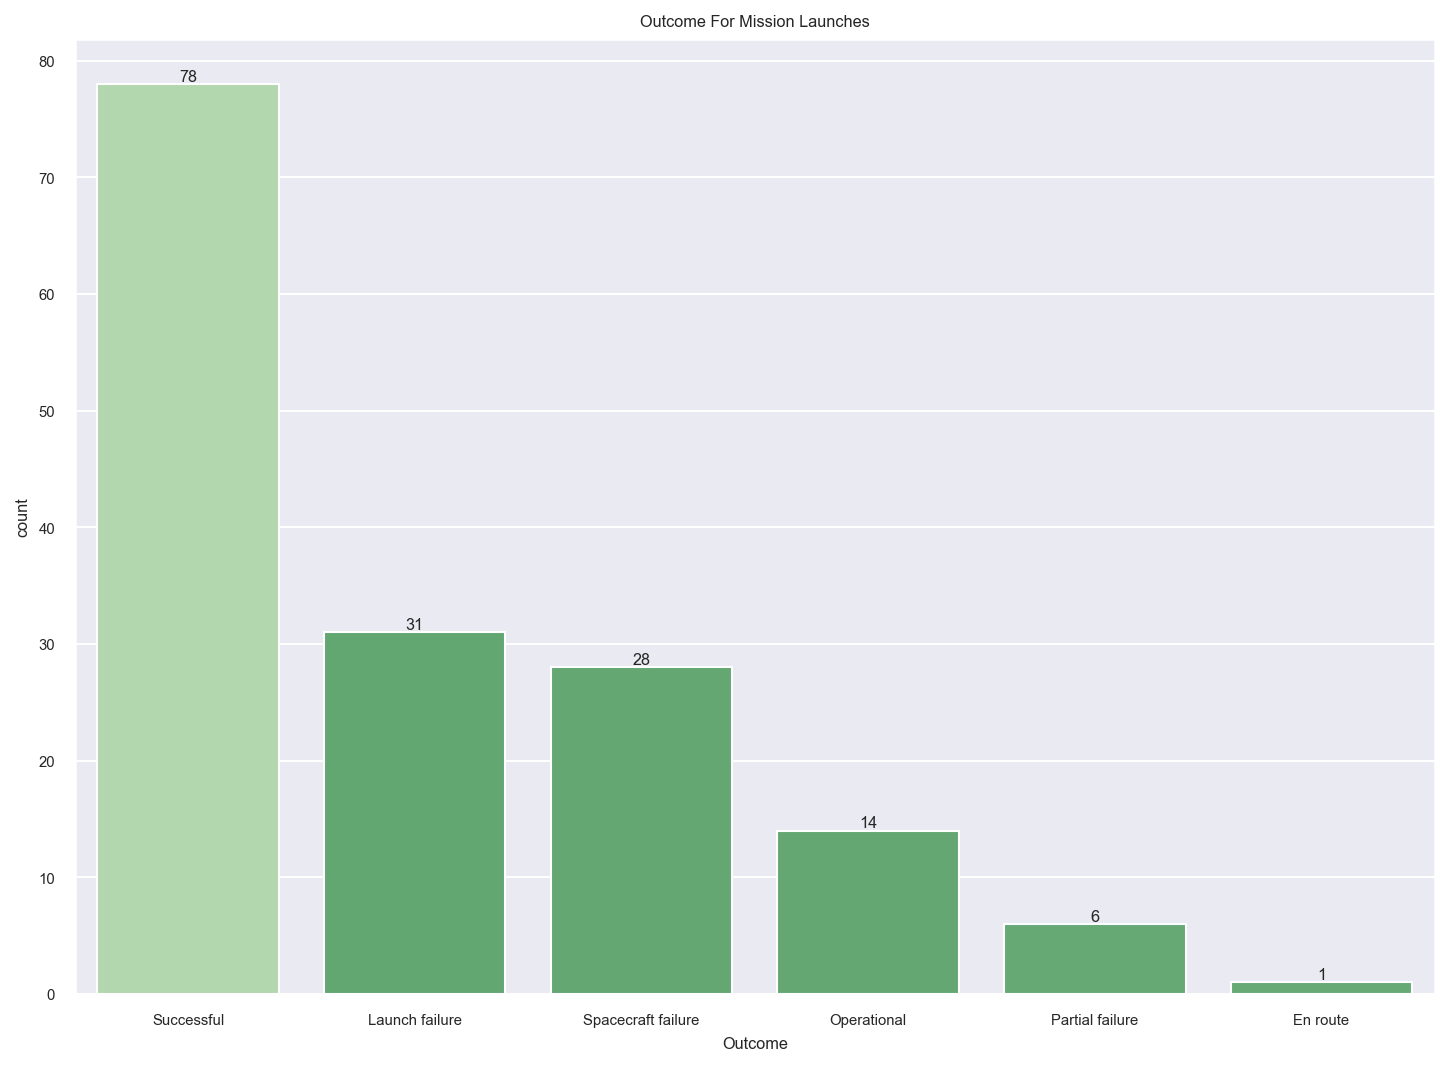

In [43]:
ax = sns.countplot(x='Outcome', data=df, palette=np.array(pal[::-1])[rank])
ax.set_title("Outcome For Mission Launches")
for i in ax.containers:
    ax.bar_label(i,)

plt.savefig("missiontotal.jpg")


In [44]:
# df.groupby(['Outcome'])["Frequency"].count()
s = df['Outcome'].value_counts()

labels = df["Outcome"].unique().tolist()


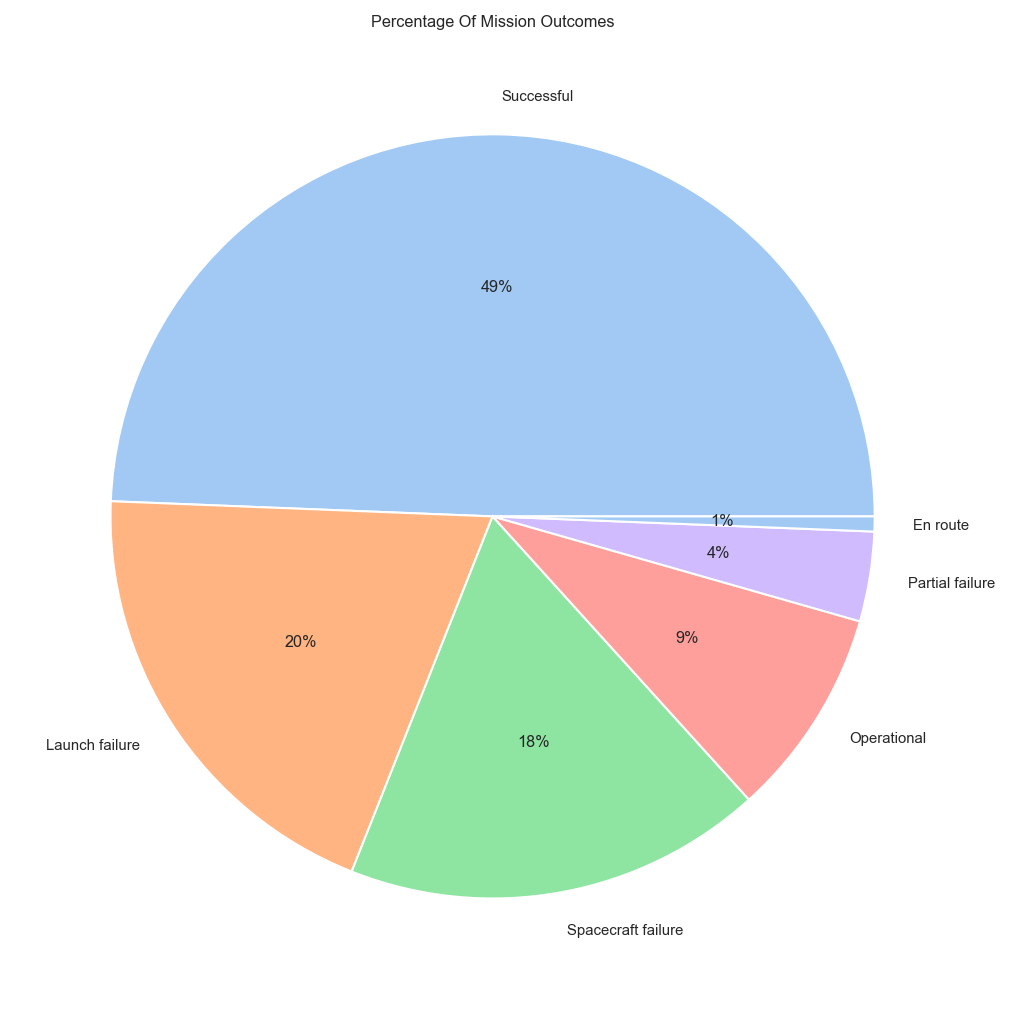

In [45]:
colors = sns.color_palette("pastel")[0:5]
plt.pie(
    s,
    labels=labels,
    colors=colors,
    autopct="%.0f%%",
)
plt.title("Percentage Of Mission Outcomes")
plt.savefig('missiontotalpie.jpg')

In [ ]:
df['Frequency'] = df.groupby('Operator')['Operator'].transform('count')
df.sort_values(['Frequency', 'Operator'], inplace=True, ascending=[False, True])

In [22]:
def categorize_country(operator):
    if "United States" in operator:
        return "United States"
    if "Soviet Union" or "Russia Roscosmos" in operator:
        return "Soviet Union"
    if "Japan" in operator:
        return "Japan"
    return operator 

def categorize_iso_values(operator):
    if "United States" in operator:
        return "USA"
    if "Soviet Union" in operator:
        return "RUS"
    if "Japan" in operator:
        return "JPN"
    if "China CNSA" in operator:
        return "CHN"
    if "India ISRO" in operator:
        return "IND"
    if "European Union ESA" in operator:
        return "EUE"
    if "Israel SpaceIL" in operator:
        return "ISR"
    if "Italy ASI" in operator:
        return "ITA"
    if "Luxembourg LuxSpace" in operator:
        return "LUX"
    if "Russia Roscosmos" in operator:
        return "RUS"
    if "South Korea KARI" in operator:
        return "KOR"
    if "UAE UAESA/MBRSC" in operator:
            return "ARE"
    return operator 

In [ ]:
df = pd.read_csv('moonall.csv',encoding='cp1252')

col = "Launch Date"
df[col] = pd.to_datetime(df[col])
future = df[col] > datetime(year=2050, month=1, day=1)
df.loc[future, col] -= timedelta(days=365.25 * 100)
df.head()

df = df.loc[
    (df[col] >= "1958-01-01") & (df[col] < "1967-12-30")
]

df['Country'] = df['Operator'].apply(categorize_country)
df['Frequency'] = df.groupby('Outcome')['Outcome'].transform('count')
df.sort_values(['Frequency', 'Outcome'], inplace=True, ascending=[False, True])
test_df = df.groupby(['Country', 'Outcome']).size()
df

In [ ]:
plt.clf()
sns.set(
    style="whitegrid",
    palette="pastel",
    color_codes=True,
    rc={"figure.figsize": (11.7, 8.27), "figure.dpi": 150},
    font_scale=0.65,
)
rank = df['Country'].argsort().argsort()
pal = sns.color_palette("Reds_r", len(df['Country']))

ax = sns.barplot(x=df['Country'].value_counts().reindex(
    df['Country'].unique(), fill_value=0) , y=df['Country'].unique().tolist(), palette=np.array(pal[::-1])[rank], orient='h')
ax.bar_label(ax.containers[0])

In [ ]:
def generate_plot(year, df):
    df = df.loc[(df[col] >= "1958-01-01") & (df[col] < f"{year}-12-30")]

    test_df = df.groupby(["Country", "Outcome"]).size()
    y = [
        "United States",
        "Soviet Union",
        "China CNSA",
        "Japan",
        "India ISRO",
        "European Union ESA",
        "Israel SpaceIL",
        "Italy ASI",
        "Luxembourg LuxSpace",
        "Russia Roscosmos",
        "South Korea KARI",
        "UAE UAESA/MBRSC",
    ]

    temp_dict = {
        "Successful": [0] * len(y),
        "Launch failure": [0] * len(y),
        "Partial failure": [0] * len(y),
        "Spacecraft failure": [0] * len(y),
        "Operational": [0] * len(y),
        "En route": [0] * len(y),
    }
    for k, v in test_df.items():
        index = y.index(k[0])
        temp_dict[k[1]][index] = v

    final_data = pd.DataFrame(
        temp_dict,
        index=y,
    )
    plt.style.use("ggplot")
    final_data.sort_values(
        ["Successful", "Launch failure"], ascending=True
    ).plot(
        kind="barh",
        stacked=True,
        title=f"Mission Launched By Country Till Year {year}",
    )
    plt.savefig(f"{year}plot.jpg")


df = pd.read_csv("moonall.csv", encoding="cp1252")
col = "Launch Date"
df[col] = pd.to_datetime(df[col])
future = df[col] > datetime(year=2050, month=1, day=1)
df.loc[future, col] -= timedelta(days=365.25 * 100)
df["Country"] = df["Operator"].apply(categorize_country)

year_range = range(1958, 2024)

for year in year_range:
    generate_plot(year, df)

In [23]:
df = pd.read_csv('moonall.csv',encoding='cp1252')

col = "Launch Date"
df[col] = pd.to_datetime(df[col])
future = df[col] > datetime(year=2050, month=1, day=1)
df.loc[future, col] -= timedelta(days=365.25 * 100)
df.head()

df = df.loc[
    (df[col] >= "1958-01-01") & (df[col] < "2023-12-30")
]

df['Country'] = df['Operator'].apply(categorize_country)
df["iso_alpha"] = df["Operator"].apply(categorize_iso_values)
df['Frequency'] = df.groupby('iso_alpha')['iso_alpha'].transform('count')
df.sort_values(['Frequency', 'iso_alpha'], inplace=True, ascending=[False, True])
df2 = df.groupby(['iso_alpha'])['iso_alpha'].count()
df2


/var/folders/8s/_5czndkj0bs5fy0_8y2bhytm0000gn/T/ipykernel_63602/1319892040.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



iso_alpha
ARE     1
CHN    15
EUE     2
IND     4
ISR     1
ITA     1
JPN    10
KOR     1
LUX     1
RUS    55
USA    67
Name: iso_alpha, dtype: int64

In [26]:
import plotly.io as pio


In [ ]:
fig = px.choropleth(df, locations='iso_alpha', color='Frequency', hover_name='iso_alpha',
                    projection='natural earth', title='Mission Launches Per Country')
fig.show()
pio.write_html(fig, file='mission_by_country.html', auto_open=True)

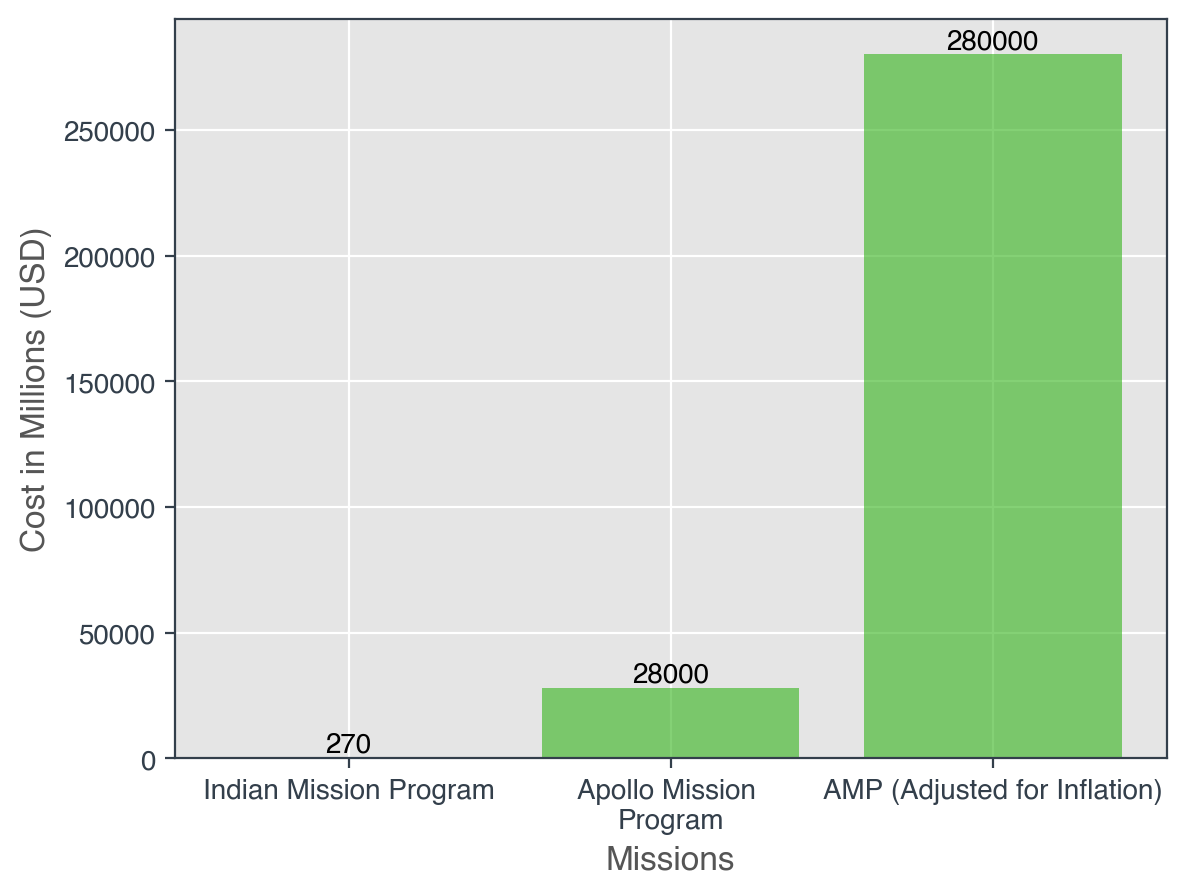

In [37]:
x = ['Indian Mission Program', 'Apollo Mission \nProgram', 'AMP (Adjusted for Inflation)']
y = [270, 28000, 280000]

color = (0.2, # redness
         0.7, # greenness
         0.1, # blueness
         0.6 # transparency
         ) 


plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
bars = ax.bar(x, y,
       color=color)
ax.bar_label(bars)
plt.xlabel('Missions') 
plt.ylabel('Cost in Millions (USD)') 
plt.savefig('indianamericanmoonprograms.jpg')
plt.show()
